# Exploration of Non-Linear Kernel Discriminant Analysis (KDA)

## First, Let's Generate Random data

In [1]:
%reset
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import random as rand


size_of_each_class = 100
distributions = [[0,5],
                [30, 15],
                [90, 3], [150, 50]]
distribution_variance = [[2, 15], [2, 1], [32, 42]]
num_classes = len(distributions)
print(num_classes, "classes")
data = []
targets = []
dimensions = 3
i = 0
#For each distribution, generate guassian data and add to our data
for mu, sigma in distributions:
    
    #Generate size_of_each_class number of normal distibution datapoints
    full_dimension = []
    for j in range(dimensions):
        rand_variance =  distribution_variance[rand.randint(0,2)] #this makes each distrubiton a little varied
        mu2 = mu +rand_variance[0]
        sigma2 = sigma + rand_variance[1]
        gaussian_data = np.random.normal(mu2, sigma2, size_of_each_class)
        full_dimension.append(gaussian_data)
    full_dimension = np.asarray(full_dimension)
    if(len(data) != 0) :
        data = np.append(data, np.transpose(full_dimension), axis = 0)
    else :
        data = np.transpose(full_dimension)
    
    #Generate a target same size as each class size        
    gen_targets = i * np.ones((1,size_of_each_class))        
    targets.append(gen_targets)
    i += 1

targets = np.asarray(targets).flatten()

print('Shape of data is : ', data.shape)
print('Shape of targets : ', targets.shape)

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


4 classes
Shape of data is :  (400, 3)
Shape of targets :  (400,)


## Visualize the data

Text(0.5, 0, 'Z')

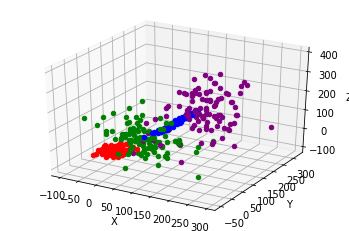

In [2]:
graph_data = data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'purple']
for i in range(len(graph_data)):
    ax.scatter(graph_data[i][0], graph_data[i][1], graph_data[i][2], c = colors[int(targets[i])])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

## KLDA

#### First, we define our kernel function
    We will be using Radian Basis Function as our kernel

num classes=  4
(4, 100, 3)
(400, 3)


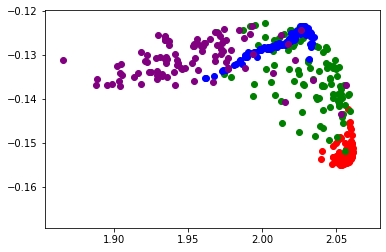

In [4]:
#run KLDA using our algorithm

import KLDA
data2 = KLDA.separate(data, targets, 45)
import matplotlib.pyplot as plt
print(data2.shape)
for i in range(len(data2)):
    plt.scatter(data2[i][0], data2[i][1], color = colors[int(targets[i])])

In [4]:
sigma = 50
def kernel(xj, xi):
    l2normsquared = np.linalg.norm(xj-xi)**2
    sigmasquared = sigma **2
    dist = np.exp(l2normsquared/(2 * sigmasquared))
    if(np.isnan(dist)):
        print("is nan")
        return 0
    return dist

### First, lets make the M matrix

In [5]:
# First we separate the data into classes
data_sep_class = []
for i in range(dimensions):
    data_sep_class.append([])
# print(data_sep_class)
j = 0
for i in range(len(data)):
    for j in range(num_classes):
        if(j == targets[i]):
            data_sep_class[j].append(np.asarray(data[i]))
            break
data_sep_class = np.asarray(data_sep_class)
# print(data_sep_class[0])


#Now we can make our M matrix
M1 = np.zeros((1,len(data)))
M2 = np.zeros((1,len(data)))

#first we do M1
for j in range(len(data)):
    summation = 0
    xj = data[j]
    for xi in data_sep_class[0]:
        summation += kernel(xi, xj)
    #this is only true if the classes are balanced
    summation /= size_of_each_class
    M1[0][j] = summation

#copypasta for m2
for j in range(len(data)):
    summation = 0
    xj = data[j]
    for xi in data_sep_class[1]:
        summation += kernel(xi, xj)
    #this is only true if the classes are balanced
    summation /= size_of_each_class
    M2[0][j] = summation

#M = (M2 - M1)T * (M2 - M1)
M = (M2 - M1).T

print(M.shape)


IndexError: list index out of range

### Great now we can do N matrix

In [46]:
# N is L x L
K1 = np.zeros((len(data), len(data_sep_class[0])))
K2 = np.zeros((len(data), len(data_sep_class[1])))

c1size = len(data_sep_class[0])
c2size = len(data_sep_class[1])
# Compute K1
for j in range(len(data)):
    xj = data[j]
    for i in range(c1size):
        xi = data_sep_class[0][i]
        K1[j][i] = kernel(xi, xj)
                   
# Compute K2
for j in range(len(data)):
    xj = data[j]
    for i in range(c2size):
        xi = data_sep_class[1][i]
        K1[j][i] = kernel(xi, xj)                  


N1 = K1 @ (np.identity(c1size) - 1/c1size * np.ones((c1size, c1size)) )  @ K1.T
N2 = K2 @ (np.identity(c1size) - 1/c2size * np.ones((c2size, c2size)) ) @ K2.T                   

N = N1 + N2


## Finally, we solve for alpha and use the new alphas as a projection for our new data

In [47]:
e = .1
a = np.linalg.inv(N + np.identity(N.shape[0])*e) @ M

print(a.shape)
Y = []
for i in range(len(data)):
    temp = 0
    for j in range(len(data)):
        alpha = a[j]
        diff = kernel(data[i], data[j])
        temp += alpha * diff
    Y.append(temp)
data = np.asarray(Y)
print(data.shape)


(200, 1)
(200, 1)


## graphing the data yields separable results

(100, 1)
(100, 1)


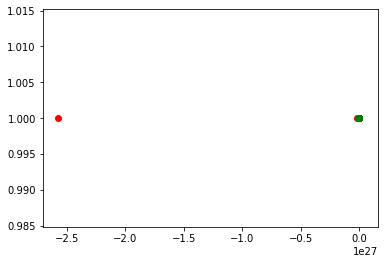

In [48]:
colors = ['r', 'g']
databottom = data[:100]
datatop = data[100:]
print(databottom.shape)
print(datatop.shape)

plt.scatter(databottom, np.ones((1,len(databottom))), color=['r'])
plt.scatter(datatop, np.ones((1, len(datatop))), color=['g'])